In [2]:
# Import the libraries we'll be using
import numpy as np
import statsmodels.api as sm
from statsmodels import regression
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
start = '2013-01-01'
end = '2015-01-01'

bench = yf.download('SPY',start= start, end=end,auto_adjust=True)['Close']['SPY']
a1 = yf.download('LRCX',start= start, end=end,auto_adjust=True)['Close']['LRCX']
a2 = yf.download('AAPL',start= start, end=end,auto_adjust=True)['Close']['AAPL']

# Perform linear regression and print R-squared values
slr12 = regression.linear_model.OLS(a2, sm.add_constant(a1)).fit()
slrb1 = regression.linear_model.OLS(a1, sm.add_constant(bench)).fit()
slrb2 = regression.linear_model.OLS(a2, sm.add_constant(bench)).fit()
print('R-squared values of linear regression')
print(f'LRCX and AAPL: {slr12.rsquared}')
print(f'LRCX and SPY: {slrb1.rsquared}')
print(f'AAPL and SPY: {slrb2.rsquared}')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

R-squared values of linear regression
LRCX and AAPL: 0.9206425396520774
LRCX and SPY: 0.8818483651530732
AAPL and SPY: 0.8241917020635829


In [4]:
# Pull pricing data from further back
start = '2009-01-01'
end = '2015-01-01'

bench = yf.download('SPY',start= start, end=end,auto_adjust=True)['Close']['SPY']
a1 = yf.download('LRCX',start= start, end=end,auto_adjust=True)['Close']['LRCX']
a2 = yf.download('AAPL',start= start, end=end,auto_adjust=True)['Close']['AAPL']

# Perform linear regression and print R-squared values
slr12 = regression.linear_model.OLS(a2, sm.add_constant(a1)).fit()
slrb1 = regression.linear_model.OLS(a1, sm.add_constant(bench)).fit()
slrb2 = regression.linear_model.OLS(a2, sm.add_constant(bench)).fit()
print('R-squared values of linear regression')
print(f'LRCX and AAPL: {slr12.rsquared}')
print(f'LRCX and SPY: {slrb1.rsquared}')
print(f'AAPL and SPY: {slrb2.rsquared}')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

R-squared values of linear regression
LRCX and AAPL: 0.5308796709140485
LRCX and SPY: 0.7365892696699026
AAPL and SPY: 0.7888441263404755


# 불필요한 변수 포함 (Inclusion of unnecessary variables) 및 과적합 (Overfitting)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
C:\Users\USER\AppData\Local\Temp\ipykernel_8940\2681653596.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slr_prediction = slr.params[0] + slr.params[1]*x1
C:\Users\USER\AppData\Local\Temp\ipykernel_8940\2681653596.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mlr_p

SLR R-squared: 0.7897353023387026
MLR R-squared: 0.8273824382474317


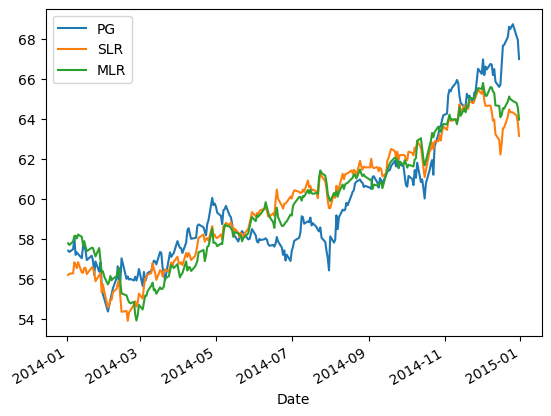

In [10]:
# Load a year and a half of pricing data
start = '2014-01-01'
end = '2015-01-01'
x1 = yf.download('PEP',start= start, end=end,auto_adjust=True)['Close']['PEP']
x2 = yf.download('MCD',start= start, end=end,auto_adjust=True)['Close']['MCD']
x3 = yf.download('AAPL',start= start, end=end,auto_adjust=True)['Close']['AAPL']
x4 = yf.download('TSLA',start= start, end=end,auto_adjust=True)['Close']['TSLA']
y = yf.download('PG',start= start, end=end,auto_adjust=True)['Close']['PG']

# Build a linear model using only x1 to explain y
slr = regression.linear_model.OLS(y, sm.add_constant(x1)).fit()
slr_prediction = slr.params[0] + slr.params[1]*x1

# Run multiple linear regression using x1, x2, x3, x4 to explain y
mlr = regression.linear_model.OLS(y, sm.add_constant(np.column_stack((x1,x2,x3,x4)))).fit()
mlr_prediction = mlr.params[0] + mlr.params[1]*x1 + mlr.params[2]*x2 + mlr.params[3]*x3 + mlr.params[4]*x4

print(f'SLR R-squared: {slr.rsquared_adj}')
print(f'MLR R-squared: {mlr.rsquared_adj}')

# Plot y along with the two different predictions
y.plot()
slr_prediction.plot()
mlr_prediction.plot()
plt.legend(['PG', 'SLR', 'MLR']);

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
C:\Users\USER\AppData\Local\Temp\ipykernel_8940\3935146951.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slr_prediction2 = slr.params[0] + slr.params[1]*x1
C:\Users\USER\AppData\Local\Temp\ipykernel_8940\3935146951.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  mlr_

SLR R-squared: -0.8113382592751719
MLR R-squared: -2.5880446589753623


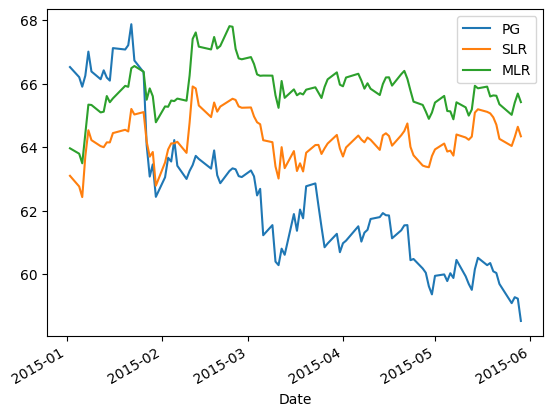

In [11]:
# Load a year and a half of pricing data
start = '2015-01-01'
end = '2015-06-01'
x1 = yf.download('PEP',start= start, end=end,auto_adjust=True)['Close']['PEP']
x2 = yf.download('MCD',start= start, end=end,auto_adjust=True)['Close']['MCD']
x3 = yf.download('AAPL',start= start, end=end,auto_adjust=True)['Close']['AAPL']
x4 = yf.download('TSLA',start= start, end=end,auto_adjust=True)['Close']['TSLA']
y = yf.download('PG',start= start, end=end,auto_adjust=True)['Close']['PG']

# Extend our model from before to the new time period
slr_prediction2 = slr.params[0] + slr.params[1]*x1
mlr_prediction2 = mlr.params[0] + mlr.params[1]*x1 + mlr.params[2]*x2 + mlr.params[3]*x3 + mlr.params[4]*x4

# Compute adjusted R-squared over the extended time period
adj = float(len(y) - 1)/(len(y) - 5) # Compute adjustment factor
SST = sum((y - np.mean(y))**2)
SSRs = sum((slr_prediction2 - y)**2)
print(f'SLR R-squared: {1 - adj*SSRs/SST}')
SSRm = sum((mlr_prediction2 - y)**2)
print(f'MLR R-squared: {1 - adj*SSRm/SST}')

y.plot()
slr_prediction2.plot()
mlr_prediction2.plot()
plt.legend(['PG', 'SLR', 'MLR']);

# 다른 모집단 통합 (Pooling different populations)

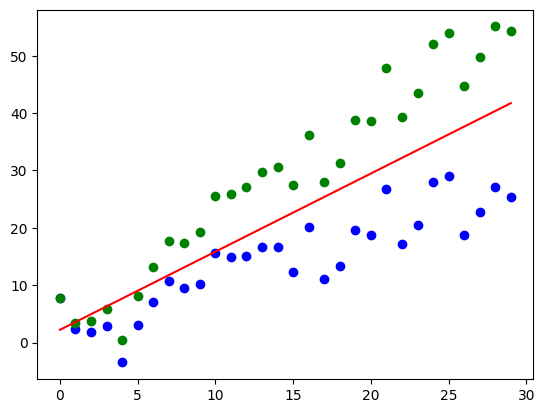

In [12]:
# Generate two artificial samples and pool them
sample1 = np.arange(30) + 4*np.random.randn(30)
sample2 = sample1 + np.arange(30)
pool = np.hstack((sample1, sample2))

# Run a regression on the pooled data, with the independent variable being the original indices
model = regression.linear_model.OLS(pool, sm.add_constant(np.hstack((np.arange(30),np.arange(30))))).fit()

# Plot the two samples along with the regression line
plt.scatter(np.arange(30), sample1, color='b')
plt.scatter(np.arange(30), sample2, color='g')
plt.plot(model.params[0] + model.params[1]*np.arange(30), color='r');

# 비정상 시계열 (Non-stationary time series)

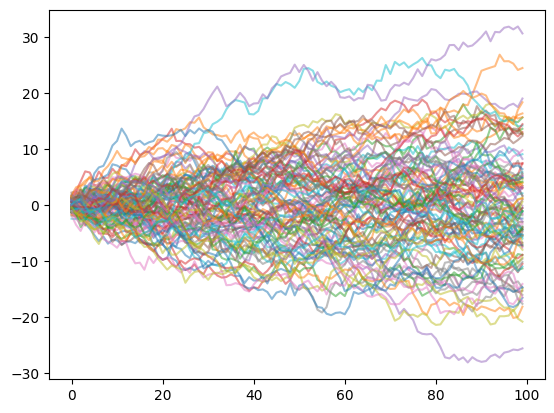

In [18]:
# Generate normally distributed errors
randos = [np.random.randn(100) for i in range(100)]
y = np.random.randn(100)

# Generate random walks
randows = [[sum(rando[:i+1]) for i in range(100)] for rando in randos]
yw = [sum(y[:i+1]) for i in range(100)]

for i in range(100):
    plt.plot(randows[i], alpha=0.5)

Linearly related walks out of 100: 0


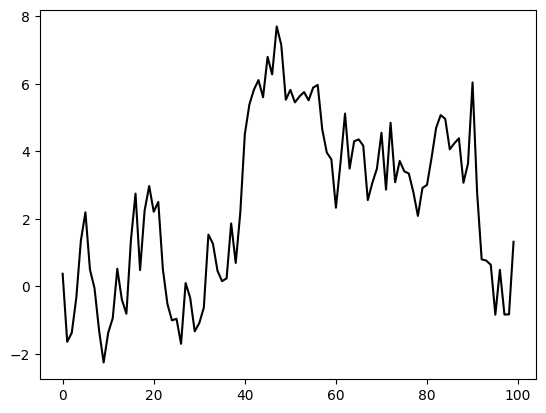

In [19]:
# Compute R-squared of linear regression for each element of randows with yw
rs = [regression.linear_model.OLS(yw, x).fit().rsquared for x in randows]
                    
# Plot and count the random walks that have R-squared with yw > .8
rcount = 0
for i in range(100):
    if rs[i] > .8:
        rcount += 1
        plt.plot(randows[i], alpha=0.5)
print(f'Linearly related walks out of 100: {rcount}')

# Plot yw
plt.plot(yw, color='k');

Significantly correlated walks out of 100: 75


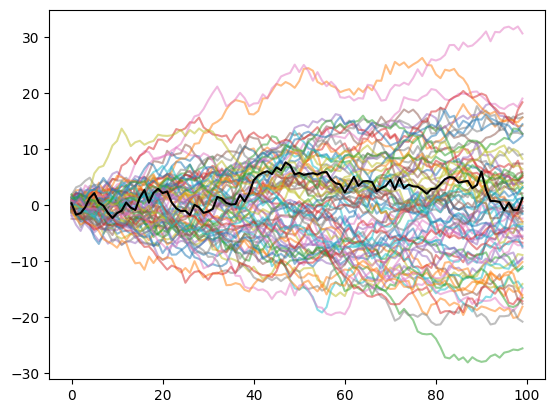

In [21]:
from scipy.stats import pearsonr

# Compute correlation coefficients (Pearson r) and record their p-values
ps = [pearsonr(yw, x)[1] for x in randows]
                    
# Plot and count the random walks that have p-value of correlation with yw < 0.05
pcount = 0
for i in range(100):
    if ps[i] < .05:
        pcount += 1
        plt.plot(randows[i], alpha=0.5)
print(f'Significantly correlated walks out of 100: {pcount}')

# Plot yw
plt.plot(yw, color='k');

In [20]:
from statsmodels.tsa.stattools import adfuller

# Compute the p-value of the Dickey-Fuller statistic to test the null hypothesis that yw has a unit root
print(adfuller(yw)[1])

0.13853756430821867
